In [37]:
import cv2
from skimage.feature import hog
from sklearn.decomposition import PCA
import numpy as np
import os
import matplotlib.pyplot as plt

### Step 1: Image Preprocessing

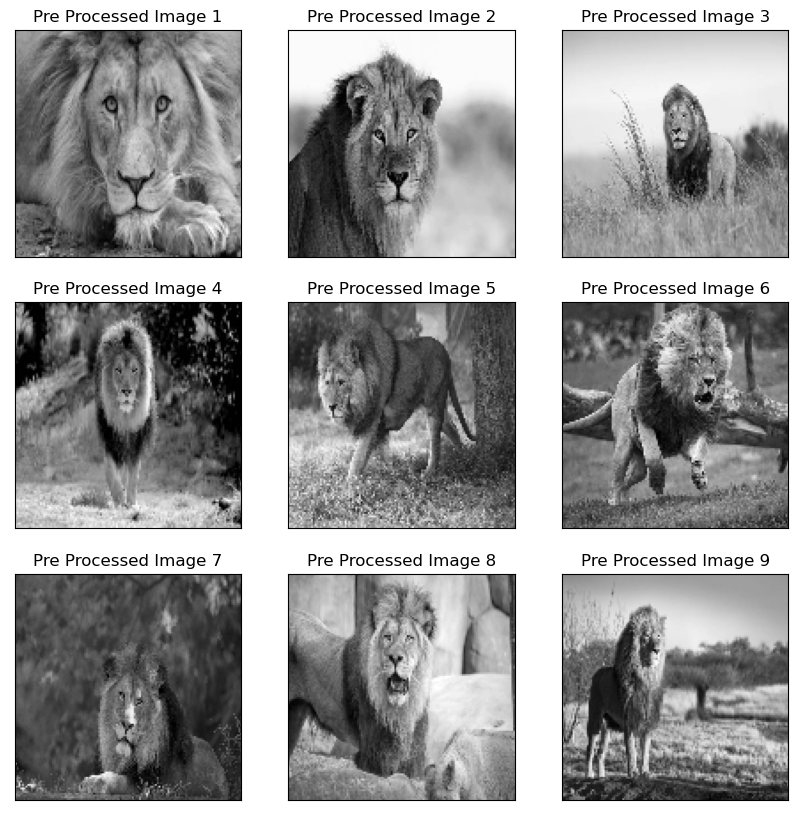

In [38]:
path_to_data = "Data"
images = []
y = []
for filename in os.listdir(path_to_data):
    if filename.endswith('.jpg'):
        img = cv2.imread(os.path.join(path_to_data, filename))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        img = cv2.resize(img, (128, 128))
        images.append(img)
        y.append(filename.split("_")[0])
        

# Show the preprocessed images using Matplotlib
fig, axs = plt.subplots(3, 3, figsize=(10, 10))
for i, ax in enumerate(axs.flat):
    ax.imshow(images[i], cmap='gray')
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(f"Pre Processed Image {i+1}")
plt.show()


### Step 2: Feature Detection

Histogram of Oriented Gradients (HOG): 
This method captures the distribution of edge orientations in an image and is often used for object detection

In [39]:
hog_features = []
for img in images:
    features = hog(img, orientations=9, pixels_per_cell=(8, 8),
                   cells_per_block=(2, 2), visualize=False, block_norm='L2-Hys')
    hog_features.append(features)
    
#HOG descriptors are already a form of feature description


### Step 3: Feature Selection

In [40]:
X = np.array(hog_features)
pca = PCA(n_components=2) # 2 principal components 
X_pca = pca.fit_transform(X)

### Step 4: Feature Extraction

In [41]:
# The LDA-transformed features are now represented as a 1D array.
print(X_pca.ravel())

[-1.9886183   0.86213763  3.27267542  7.15106128  7.3044353  -4.65828427
 -2.32383024 -0.86782635 -1.86184113 -0.6875062  -1.38337643 -0.93002015
 -2.96765876 -0.2569203  -3.2094126  -1.40194857  3.15762674  0.78930693]
